## Assignment 1.1 | API Scraping Ed Sheeran and Taylor Swift 

### Lane Whitmore

### May 15th, 2023

### ADS 509

In [2]:
# imports

import os
import datetime
import re

# for the lyrics scrape section
import requests
import time
from bs4 import BeautifulSoup
from collections import defaultdict, Counter
import random

In [1]:
# Extra Imports // if needed
import shutil
from IPython.display import Image, display

### Lyrics Scraping

In [3]:
artists = {'taylorswift':"https://www.azlyrics.com/t/taylorswift.html",
           'edsheeran':"https://www.azlyrics.com/e/edsheeran.html"} 

In [4]:
lyrics_pages = defaultdict(list)

# creating lists to append to within the for loop
taylor = []
ed = []

for artist, artist_page in artists.items():
    # request the page and sleep
    r = requests.get(artist_page)
    time.sleep(5 + 10*random.random())

    # Using beautiful soup package to parse the html
    soup = BeautifulSoup(r.content, "html.parser")

    # pulling out the buttons with urls that link to each song. The first three have been dropped as they are other links
    # additionally this method could be used to limit the discographies to certain albums
    song = soup.find_all("a", target = "_blank")[3:]
    # For each button, the url is being extracted using the .get function from beautiful soup
    for ref in song:
        songhtml = ref.get("href")
        # Created an if | else statement to sort out the songs within the two different artists
        if artist == "edsheeran":
            # append individual song lyrics to the lists created above for later storage in dictionary
            ed.append(songhtml)
        else:
            taylor.append(songhtml)

# appending the lists to the dictionary
lyrics_pages['edsheeran'] = ed
lyrics_pages['taylorswift'] = taylor

print(lyrics_pages['edsheeran'])
print(lyrics_pages['taylorswift'])

['/lyrics/edsheeran/moodyballadofed.html', '/lyrics/edsheeran/misery.html', '/lyrics/edsheeran/typicalaverage.html', '/lyrics/edsheeran/addicted.html', '/lyrics/edsheeran/iloveyou.html', '/lyrics/edsheeran/openyourears.html', '/lyrics/edsheeran/beyondthepale.html', '/lyrics/edsheeran/inmemory.html', '/lyrics/edsheeran/insomniacslullaby.html', '/lyrics/edsheeran/quietballadofed.html', '/lyrics/edsheeran/noluck.html', '/lyrics/edsheeran/stevensong.html', '/lyrics/edsheeran/billyruskin.html', '/lyrics/edsheeran/spark.html', '/lyrics/edsheeran/pause.html', '/lyrics/edsheeran/thesea.html', '/lyrics/edsheeran/wayhome.html', '/lyrics/edsheeran/bonustrack.html', '/lyrics/edsheeran/youbreakme.html', '/lyrics/edsheeran/imgladimnotyou.html', '/lyrics/edsheeran/youneedtocutyourhair.html', '/lyrics/edsheeran/sara.html', '/lyrics/edsheeran/moveon.html', '/lyrics/edsheeran/yellowpages.html', '/lyrics/edsheeran/smile.html', '/lyrics/edsheeran/postcards.html', '/lyrics/edsheeran/twoblokesandadoublebass

#### Comments on scraping the htmls

The URL segments for each song is stored within anchor elements. The easiest way to grab all of those anchor elements at once is to use find_all with the target = "_blank" as that is the only identifier that is shared across the anchors. Unfortunately this grabs 3 extra anchors at the top for their social media links, but these can easily be skipped in a similar way to any list with python by using []. After extracting a list of anchors, these can then be looped through to extract the URL segments by using get(href) and then put through an if else statement to put the urls in the lists for their respective artists prior to attaching those lists to the dictionary lyrics_pages. 

In [5]:
for artist, lp in lyrics_pages.items():
    print(artist + ":", len(set(lp)), "Songs in Discography.")
    print(len(set(lp)) > 20, "| it is greater than 20 songs.")  
    print(" ") 

edsheeran: 256 Songs in Discography.
True | it is greater than 20 songs.
 
taylorswift: 373 Songs in Discography.
True | it is greater than 20 songs.
 


These two artists clearly have a huge discography and the scraping is expected to take a while. 

In [6]:
# Let's see how long it's going to take to pull these lyrics 
# if we're waiting `5 + 10*random.random()` seconds 
for artist, links in lyrics_pages.items() : 
    print(f"For {artist} we have {len(links)}.")
    print(f"The full pull will take for this artist will take {round(len(links)*10/3600,2)} hours.")
    print(" ")

For edsheeran we have 258.
The full pull will take for this artist will take 0.72 hours.
 
For taylorswift we have 373.
The full pull will take for this artist will take 1.04 hours.
 


As expected, it should take just under two hours to scrape the entire discography for these artists. 

### Filname Extractor

In [7]:
def generate_filename_from_link(link):
    
    if not link :
        return None
    
    # drop the http or https and the html
    name = link.replace("https","").replace("http","")
    name = link.replace(".html","")

    name = name.replace("/lyrics/","")
    
    # Replace useless chareacters with UNDERSCORE
    name = name.replace("://","").replace(".","_").replace("/","_")

    # This segment had to be added as the above left this creating rather ugly filenames
    name = name.replace("httpswww_azlyrics_com", "")
    
    # tack on .txt
    name = name + ".txt"
    
    return(name)

In [8]:
# creating lyrics folder in ADS 509 folder
if os.path.isdir("lyrics") : 
    shutil.rmtree("lyrics/")

os.mkdir("lyrics/")

In [9]:
# sample filename
generate_filename_from_link("https://www.azlyrics.com/lyrics/taylorswift/timmcgraw.html")

'taylorswift_timmcgraw.txt'

### Scraping Song Lyrics

In [13]:
url_stub = "https://www.azlyrics.com" 
start = time.time()


total_pages = 0 
for artist, song in lyrics_pages.items():

    # Creating the folders for both artists and avoiding any errors when re-running the for loop
    if os.path.exists("lyrics/" + artist + "/") == True:
        print(artist + " folder already exists")
    else:
        os.mkdir("lyrics/" + artist + "/")
        print("created directory: lyrics/" + artist + "/")


    for i in list(song):
        # keeping count of how many pages were crawled | should match the total value of both artists songs printed above
        total_pages += 1

        # fixing multiple href exceptions from scraping due to songs being by another person on their album causing https://www.azlyrics.com to be present in what is scraped
        i = i.replace("https://www.azlyrics.com", "")
        
        # generating filename from the link
        filename = generate_filename_from_link(url_stub + i)

        # requesting the url by iterating through the lists
        # printing the url to track throughout
        print(url_stub + i)
        r = requests.get(url_stub + i)

        # sleeping between page crawls
        time.sleep(5 + 10*random.random())

        # creating soup
        soup = BeautifulSoup(r.content, "html.parser")
        
        # Extracting the title from the html
        div = soup.find("div", class_ = "col-xs-12 col-lg-8 text-center")
        title = div.h1.text

        # Cleaning the title by removing "Lyrics" and any double quotes
        title = title.rsplit(' ', 1)[0].replace('"','')
        print(f"Extracting and writing to file {title} by {artist}")

        # Extracting the lyrics from the html
        lyric = soup.find("div", attrs={'class': None, 'id': None}).text
        lyric.replace("/n", " ").replace("/r", " ")
        
        # storing the lyrics and title according to artist
        if artist == "edsheeran":
            titlelyric = str(title + "/n/n" + lyric)
            with open(f'lyrics/edsheeran/{filename}','w') as data:
                data.write(titlelyric)
        else: 
            titlelyric = str(title + "/n/n" + lyric)
            with open(f'lyrics/taylorswift/{filename}','w') as data:
                data.write(titlelyric)

print(total_pages)

edsheeran folder already exists
https://www.azlyrics.com/lyrics/edsheeran/moodyballadofed.html
Extracting and writing to file Moody Ballad Of Ed by edsheeran
https://www.azlyrics.com/lyrics/edsheeran/misery.html
Extracting and writing to file Misery by edsheeran
https://www.azlyrics.com/lyrics/edsheeran/typicalaverage.html
Extracting and writing to file Typical Average by edsheeran
https://www.azlyrics.com/lyrics/edsheeran/addicted.html
Extracting and writing to file Addicted by edsheeran
https://www.azlyrics.com/lyrics/edsheeran/iloveyou.html
Extracting and writing to file I Love You by edsheeran
https://www.azlyrics.com/lyrics/edsheeran/openyourears.html
Extracting and writing to file Open Your Ears by edsheeran
https://www.azlyrics.com/lyrics/edsheeran/beyondthepale.html
Extracting and writing to file Beyond The Pale by edsheeran
https://www.azlyrics.com/lyrics/edsheeran/inmemory.html
Extracting and writing to file In Memory by edsheeran
https://www.azlyrics.com/lyrics/edsheeran/ins

#### Comments 

First the artist and song url are looped through in the dictionary to extract the filename from the url and create the text file using os.mkdir function. 

Then, another for loop is used to loop through each url and request the page after attaching it to the url_stub string. 

After, There are numerous steps:

        1. Keep track of the total pages crawled, this should be equal to the amount of links

        2. Clean up multiple songs that contained the entire url instead of a url segment because, for example, Rudimental is the credited artist for a song on Ed Sheeran's album "X"

        3. Get the html from the URL

        4. Create some soup
        
        5. One div or division within each page contains the title. This is extracted by using div.h1.text, but the title still needs to be cleaned as it has quotes around it and is followed by the word "lyrics". These are both removed using the replace string method.

        6. The second division that is extracted from the soup contains our lyrics. These were extracted by choosing the only div with no class nor title as the lyrics div had nothing to distinguish it as unique outside of that. It was then cleaned by removing the line breaks /n and /r as for our purposes we are simply looking at the unique words within the discography and the data looks cleaner stored in this way within the text file. If our purpose was to evaluate how many rhymes existed for lines or what the rhyme scheme is, we would want to keep these breaks, but for our purpose this should work. 

        7. An if else statement is then used again to store the title separated by /n/n with the lyrics into a text file within the folder that belongs to each respective artist. This is done by opening the filename location then saving the string as a text file in that location.

        8. Total Pages are printed at the end to ensure the crawl count is the same. 

#### Screenshot of example text file

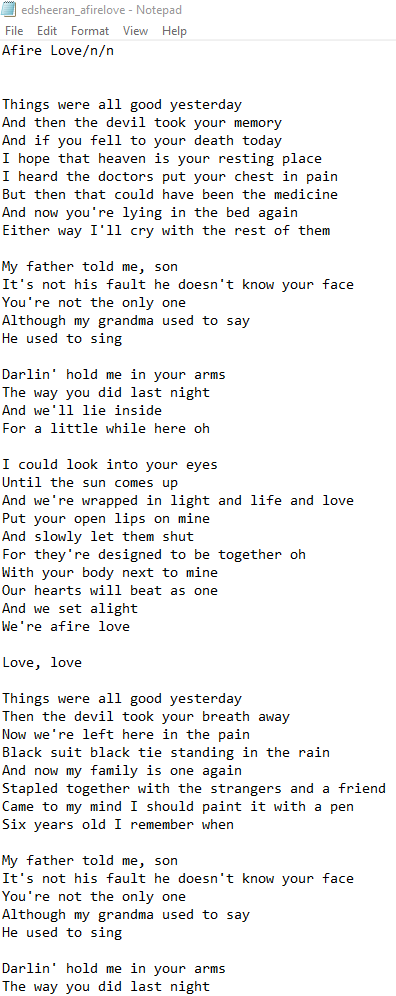

In [17]:
display(Image(filename='exampletxtAfire.png'))

#### Runtime

In [14]:
print(f"Total run time was {round((time.time() - start)/3600,2)} hours.")

Total run time was 1.85 hours.


The prediction for how long it would take was pretty accurate. The loop ran 5-10 min slower than expected. 

### Extracting Words from Saved Files

In [15]:
# Simple word extractor from Peter Norvig: https://norvig.com/spell-correct.html
def words(text): 
    return re.findall(r'\w+', text.lower())

In [16]:
artist_folders = os.listdir("lyrics/")
artist_folders = [f for f in artist_folders if os.path.isdir("lyrics/" + f)]

for artist in artist_folders : 
    artist_files = os.listdir("lyrics/" + artist)
    artist_files = [f for f in artist_files if 'txt' in f or 'csv' in f or 'tsv' in f]

    print(f"For {artist} we have {len(artist_files)} files.")

    artist_words = []

    for f_name in artist_files : 
        with open("lyrics/" + artist + "/" + f_name) as infile : 
            artist_words.extend(words(infile.read()))

            
    print(f"For {artist} we have roughly {len(artist_words)} words, {len(set(artist_words))} are unique.")

For edsheeran we have 256 files.
For edsheeran we have roughly 103058 words, 6032 are unique.
For taylorswift we have 373 files.
For taylorswift we have roughly 134006 words, 4609 are unique.


Taylor Swift has more words than Ed Sheeran because she has more songs, but interestingly, she has less unique words. I wonder if due to her remakes of her prior albums that have been tied up in legal and economic disputes have led to a lower number than perhaps it could have been. The remakes contain generally the same lyrics with only slight differences on a few songs re-recorded now. Although, Ed Sheeran  also has many remixes and remakes that could perhaps be creating a similar representation within these statistics. 